In [0]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

    100% |████████████████████████████████| 133kB 6.6MB/s 


In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#My Twitter API Authentication Variables
consumer_key = 'kMakzgiZmtZKXN4rZE0RjG64k'
consumer_secret = 'V4gI9zTBP6ZxbvwnslZxZEwOUZPwGvDHwTK8LaRxO5EkJlTNQa'
access_token = '767779115776684032-ypRzTGqbgVpSb2gkYmCuvl3pP4SOQE9'
access_token_secret = 'beHZc8aRyaXXpxZoxTaODu6idNCJVpjB2JWQ8FajJAbLx'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('I was raped', count=200)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)

,Tweets
0,RT @AhmadJaafaru: With regards to rape stance ...
1,RT @kimmyj_Cx2: @bbusa617 This poor woman is v...
2,RT @VashiMant: I don't know how Muhammad of re...
3,"These stories, so many, make me sick to my sto..."
4,RT @VashiMant: I don't know how Muhammad of re...
5,and she told me something similar happened to ...
6,"yeah, Michelle, you're right - I'm sure if the..."
7,@GabeTheDeadFish @PapaZubi @trailsofsmoke @50c...
8,RT @VashiMant: I don't know how Muhammad of re...
9,RT @wilcotnyd: As supporters of sexual assault...


2019-02-20 03:37:55


In [0]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [0]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1098064178546397184
2019-02-20 03:37:55
Twitter for iPhone
0
562
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AhmadJaafaru', 'name': 'Principino', 'id': 3065572100, 'id_str': '3065572100', 'indices': [3, 16]}], 'urls': []}


In [0]:
import numpy as np

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [0]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @AhmadJaafaru: With regards to rape stance ...,140,1098064178546397184,2019-02-20 03:37:55,Twitter for iPhone,0,562
1,RT @kimmyj_Cx2: @bbusa617 This poor woman is v...,148,1098064118085373952,2019-02-20 03:37:41,Twitter for iPhone,0,2
2,RT @VashiMant: I don't know how Muhammad of re...,140,1098064093557092352,2019-02-20 03:37:35,Twitter for Android,0,391
3,"These stories, so many, make me sick to my sto...",132,1098064081116893189,2019-02-20 03:37:32,Twitter for iPhone,1,0
4,RT @VashiMant: I don't know how Muhammad of re...,140,1098063898400350208,2019-02-20 03:36:49,Twitter Web App,0,391
5,and she told me something similar happened to ...,140,1098063805010063363,2019-02-20 03:36:26,Twitter for iPhone,0,0
6,"yeah, Michelle, you're right - I'm sure if the...",139,1098063562440871937,2019-02-20 03:35:28,Twitter Web Client,0,0
7,@GabeTheDeadFish @PapaZubi @trailsofsmoke @50c...,140,1098063504043593728,2019-02-20 03:35:15,Twitter for iPhone,0,0
8,RT @VashiMant: I don't know how Muhammad of re...,140,1098063503775027200,2019-02-20 03:35:14,Twitter for Android,0,391
9,RT @wilcotnyd: As supporters of sexual assault...,140,1098063264645230592,2019-02-20 03:34:17,Twitter for iPhone,0,2


In [0]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 135.33


In [0]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
You know what's the stupidest thing I can hear from ignorant people "oh look what she was wearing or doing, she was… https://t.co/0hoaBkc6uC
Number of likes: 4
140 characters.

The tweet with more retweets is: 
RT @rozalynxalyse: after i was raped, they posted his mugshot on facebook. my friends commented and said “i heard the little girl lied abou…
Number of retweets: 69321
140 characters.



In [0]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

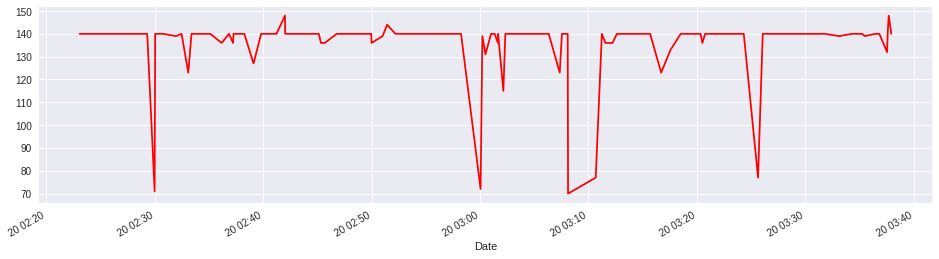

In [0]:
tlen.plot(figsize=(16,4), color='r');

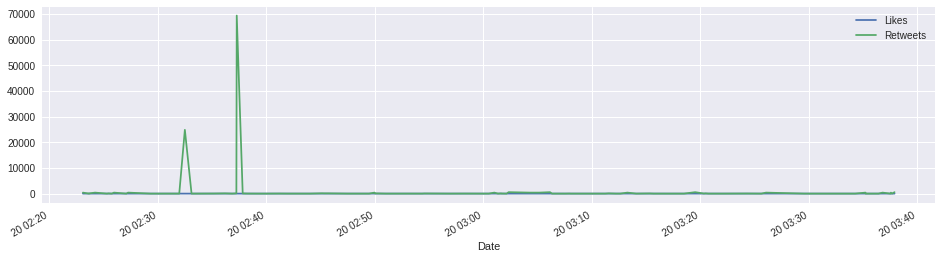

In [0]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [0]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter for Android
* Twitter Web App
* Twitter Web Client
* WordPress.com
* Hootsuite Inc.
* Twitter for iPad
* TweetDeck
* nembotavy_010101


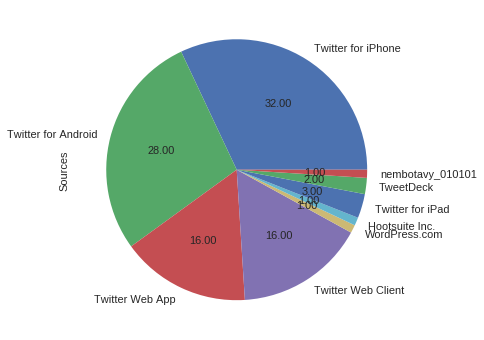

In [0]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [0]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
tok = WordPunctTokenizer()
pat1 = r'@rt[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    let = re.sub("[rt]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = data.Tweets[:10]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['rt ahmadjaafaru with regards to rape stance in islam i would like to share this powerful hadith it s there in sunnan abu dawud about r',
 'rt kimmyj cx bbusa this poor woman is very very brave she was covering a story in the middle east kidnapped almost murdered b',
 'rt vashimant i don t know how muhammad of real islam was but md of jaish e md kept sex slaves raped women kids killed innocents bro',
 'these stories so many make me sick to my stomach i am sorry she was raped but her racism is inexcusable',
 'rt vashimant i don t know how muhammad of real islam was but md of jaish e md kept sex slaves raped women kids killed innocents bro',
 'and she told me something similar happened to her too that he had raped her she told me everything we sat and cr',
 'yeah michelle you re right i m sure if the people who were raped and decapitated in el salvador had gotten the',
 'gabethedeadfish papazubi trailsofsmoke cent what i ve learned is that someone we idolize can be two different',
 'rt 

In [0]:
nums = [0,100,200]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10 == 0 ):
        print( "Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(data['Tweets'][i]))

Cleaning and parsing the tweets...

Tweets 10 of 100 has been processed
Tweets 20 of 100 has been processed
Tweets 30 of 100 has been processed
Tweets 40 of 100 has been processed
Tweets 50 of 100 has been processed
Tweets 60 of 100 has been processed
Tweets 70 of 100 has been processed
Tweets 80 of 100 has been processed
Tweets 90 of 100 has been processed
Tweets 100 of 100 has been processed


In [0]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in clean_df['text'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @AhmadJaafaru: With regards to rape stance ...,140,1098064178546397184,2019-02-20 03:37:55,Twitter for iPhone,0,562,1
1,RT @kimmyj_Cx2: @bbusa617 This poor woman is v...,148,1098064118085373952,2019-02-20 03:37:41,Twitter for iPhone,0,2,1
2,RT @VashiMant: I don't know how Muhammad of re...,140,1098064093557092352,2019-02-20 03:37:35,Twitter for Android,0,391,0
3,"These stories, so many, make me sick to my sto...",132,1098064081116893189,2019-02-20 03:37:32,Twitter for iPhone,1,0,-1
4,RT @VashiMant: I don't know how Muhammad of re...,140,1098063898400350208,2019-02-20 03:36:49,Twitter Web App,0,391,0
5,and she told me something similar happened to ...,140,1098063805010063363,2019-02-20 03:36:26,Twitter for iPhone,0,0,0
6,"yeah, Michelle, you're right - I'm sure if the...",139,1098063562440871937,2019-02-20 03:35:28,Twitter Web Client,0,0,1
7,@GabeTheDeadFish @PapaZubi @trailsofsmoke @50c...,140,1098063504043593728,2019-02-20 03:35:15,Twitter for iPhone,0,0,0
8,RT @VashiMant: I don't know how Muhammad of re...,140,1098063503775027200,2019-02-20 03:35:14,Twitter for Android,0,391,0
9,RT @wilcotnyd: As supporters of sexual assault...,140,1098063264645230592,2019-02-20 03:34:17,Twitter for iPhone,0,2,1


In [0]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = data.SA
clean_df.head()

,text,target
0,rt ahmadjaafaru with regards to rape stance in...,1
1,rt kimmyj cx bbusa this poor woman is very ver...,1
2,rt vashimant i don t know how muhammad of real...,0
3,these stories so many make me sick to my stoma...,-1
4,rt vashimant i don t know how muhammad of real...,0


In [0]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [0]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 56.38297872340426%
Percentage of neutral tweets: 28.72340425531915%
Percentage de negative tweets: 14.893617021276595%


In [0]:
 df = pd.DataFrame({'Sentiment Analysis For Tweeets Expressing Rape Experiences': [len(pos_tweets)*100/len(data['Tweets']), len(neu_tweets)*100/len(data['Tweets']) , len(neg_tweets)*100/len(data['Tweets'])]},index=['pos', 'neu', 'neg'])


,Sentiment Analysis For Tweeets Expressing Rape Experiences
pos,56.382979
neu,28.723404
neg,14.893617


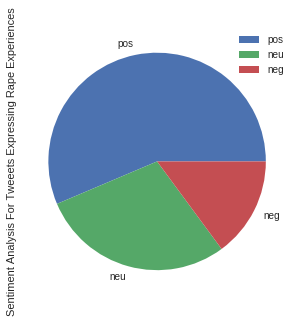

In [0]:
plot = df.plot.pie(y='Sentiment Analysis For Tweeets Expressing Rape Experiences', figsize=(5, 5))
df